In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

## Import

In [3]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')
dataset.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.shape

(10000, 10)

# UCB Algorithm

1. At each round, we consider two numbers for each ad $i$:
    - $N_i(n)$ - the number of times the ad $i$ was selected up to round $n$
    - $R_i(n)$ - the sum of rewards of the ad $i$ up to round $n$
2. From these two numbers we compute:
    - Average reward of ad $i$ up to round $n$
      
      $\overline{r}_i(n) = \frac{R_i(n)}{N_i(n)}$

    - The confidence interval $[\overline{r}_i(n) - \Delta_i(n) , \overline{r}_i(n) + \Delta_i(n)]$ at round $n$ with
  
      $\Delta_i(n) = \sqrt{\frac{3 log(n)}{2N_i(n)}}$

3. We select the ad $i$ that has the maximum UCB $\overline{r}_i(n) + \Delta_i(n)$


In [5]:
import math

## Simulation

In [6]:
N = 1000
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(N):
    ad = 0
    max_upper_bound = 0
    for i in range(d):
        if (numbers_of_selections[i]>0):
            avg_reward = sum_of_rewards[i] / numbers_of_selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/numbers_of_selections[i])
            upper_bound = avg_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    numbers_of_selections[ad] += 1
    reward = dataset.values[n,ad]
    sum_of_rewards[ad] = sum_of_rewards[ad] + reward
    total_reward = total_reward + reward

# Visualisation

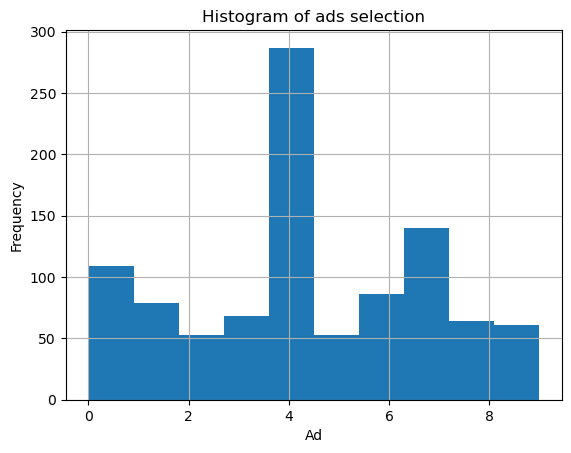

In [7]:
plt.hist(ads_selected)
plt.title('Histogram of ads selection')
plt.xlabel('Ad')
plt.ylabel('Frequency')
plt.grid();